# Dongo-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
* [Verbreitung](#Verbreitung)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'DON'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [157]:
sql = """SELECT
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_komplex.bef_nr,
           t_Obj.individuum,
           t_komplex.bef_art,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like 'DON%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# Anzahl Scherben:
df.pivot_table(values = 'Anzahl', index = 'Typ', aggfunc = sum, margins = True)  # Anzahl GE

Typ
DON            104.0
DON (?)         43.0
DON/MAT (?)      1.0
All            148.0
Name: Anzahl, dtype: float64

In [158]:
# GE
df.loc[df['Anzahl'] == 1].pivot_table(values = 'objID', index = 'Typ', aggfunc = len, margins = True)  # Anzahl GE

Typ
DON             67.0
DON (?)         43.0
DON/MAT (?)      1.0
All            111.0
Name: objID, dtype: float64

In [159]:
# ausgezählte Scherben
df.loc[df['Anzahl'] != 1].pivot_table(values = 'Anzahl', index = 'Typ', aggfunc = sum, margins = True)  # Anzahl GE

Typ
DON    37.0
All    37.0
Name: Anzahl, dtype: float64

In [160]:
df_pivot = df.pivot_table(values = 'objID', index = ['bef_art', 'Ort', 'bef_nr'], columns = 'Typ', aggfunc = len, margins = True)
df_pivot

Typ                                            DON  DON (?)  DON/MAT (?)  \
bef_art Ort                         bef_nr                                 
Grube   Maluba (Fpl. 230)           85/1-3-1   3.0      2.0          NaN   
                                    85/103     3.0      2.0          NaN   
Oberfl  Balongoi (Fpl. 214)         85/101     1.0      NaN          NaN   
        Batanga (Fpl. 209)          85/101     NaN      1.0          NaN   
        Bousoka-Mangombe (Fpl. 200) 85/101     1.0      1.0          NaN   
        Dongo (Fpl. 202)            85/101    25.0     12.0          1.0   
                                    85/102     7.0      4.0          NaN   
        Ilawa (Fpl. 232)            85/101     NaN      2.0          NaN   
        Maluba (Fpl. 230)           85/101     3.0      7.0          NaN   
                                    85/104     NaN      1.0          NaN   
        Mbati-Ngombe (Fpl. 204)     85/101    17.0      4.0          NaN   
        Mboko 1 (Fpl. 217)          85/101     NaN      1.0          NaN   
        Mboma (Fpl. 211)            85/101     1.0      NaN          NaN   
        Motenge-Boma (Fpl. 206)     85/101     2.0      5.0          NaN   
        Ngbanja (Fpl. 199)          85/101     1.0      NaN          NaN   
        Nzambi (Fpl. 205)           85/101    10.0      1.0          NaN   
All                                           74.0     43.0          1.0   

Typ                                             All  
bef_art Ort                         bef_nr           
Grube   Maluba (Fpl. 230)           85/1-3-1    5.0  
                                    85/103      5.0  
Oberfl  Balongoi (Fpl. 214)         85/101      1.0  
        Batanga (Fpl. 209)          85/101      1.0  
        Bousoka-Mangombe (Fpl. 200) 85/101      2.0  
        Dongo (Fpl. 202)            85/101     38.0  
                                    85/102     11.0  
        Ilawa (Fpl. 232)            85/101      2.0  
        Maluba (Fpl. 230)           85/101     10.0  
                                    85/104      1.0  
        Mbati-Ngombe (Fpl. 204)     85/101     21.0  
        Mboko 1 (Fpl. 217)          85/101      1.0  
        Mboma (Fpl. 211)            85/101      1.0  
        Motenge-Boma (Fpl. 206)     85/101      7.0  
        Ngbanja (Fpl. 199)          85/101      1.0  
        Nzambi (Fpl. 205)           85/101     11.0  
All                                           118.0

In [161]:
len(df_pivot.index)-1   # Anzahl der FdSt mit DON-Keramik -1 (für die Summenzeile in der Tab. oben)

16

## Technologische Merkmale (*fabrics*)

In [2]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like 'DON%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [3]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


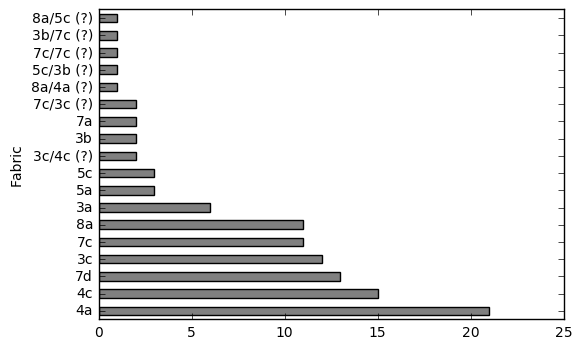

In [4]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [5]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head(7))

,Anzahl,Prozent
Fabric,,
4a,21,19.444444
4c,15,13.888889
7d,13,12.037037
3c,12,11.111111
7c,11,10.185185
8a,11,10.185185
3a,6,5.555556


In [6]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungDichte,,
mittel,39,36.111111
viel,36,33.333333
,16,14.814815
sehr viel,13,12.037037
wenig,4,3.703704


In [7]:
df.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)

MagerungArt
                       16
Gl/Laterit              1
S                      66
S/Gl                   13
S/Gl/Laterit            1
S/Laterit               5
S/Org                   2
S/Schamott (?)          1
S/rote Partikel         2
S/schwarze Partikel     1
Name: Anzahl, dtype: int64

### Brennfarbe

In [13]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%DON%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,39,33.620690
Sonstig,52,44.827586
Weiß,25,21.551724


In [14]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [15]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

bg       68
g        53
         45
s        37
         13
bg bg    10
bg s      5
g bg      5
g s       4
bg g      3
dtype: int64

### Oberfläche der Scherben

In [16]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE 'DON%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Obfl
außen leicht rau/innen glatt     1
glatt                           45
glatt/leicht rau                 3
glatt/leicht sandig              1
glatt/leicht sanig               1
leicht rau                      34
leicht rau/sandig                1
leicht sandig                    1
leicht sandig/rau                1
rau                              4
Name: Anzahl, dtype: int64

### Wandungsdicke

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/home/dirk/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/home/dirk/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


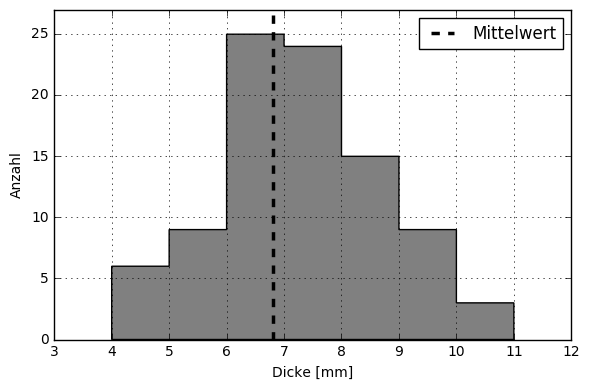

In [17]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE 'DON%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
plt.xlabel("Dicke [mm]")
plt.ylabel("Anzahl")
plt.xlim([3,12])
plt.ylim([0,27])
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()
plt.show()

In [18]:
df['Wandung'].describe()

/home/dirk/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    91.000000
mean      6.813187
std       1.504896
min       4.000000
25%            NaN
50%            NaN
75%            NaN
max      11.000000
Name: Wandung, dtype: float64

In [19]:
df['Wandung'].var()

2.2647130647130655

## Gefäßformen

In [83]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%DON%')
           AND ((t_Obj.Form_Gef) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [84]:
df['Form_Gef_GR'] = df['Form_Gef'].map(lambda x: str(x)[:1])

df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef_GR', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


Anzahl der Stücke, welche der 'Dongo'-Gruppe zugewiesen werden könne und bei denen eine Gefäßeform ermittelt werden konnte:

In [85]:
df_pivot['objID'].sum()

84

Verteilung der Gefäßformen der 'Mokelo'-Gruppe:

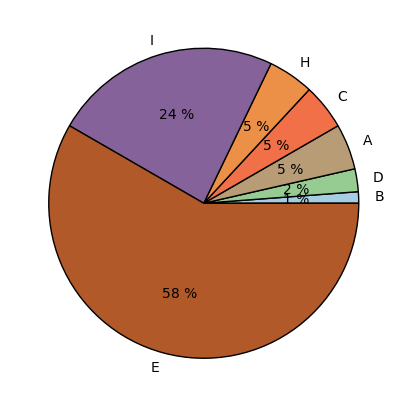

In [86]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

> **Abb. #** Dongo-Gruppe: Gefäßformen.

In [87]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['objID'], ascending=True)

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [88]:
len(df_pivot['objID'])    # Anzahl beobachtete Gef-Formen

21

### Bauchform

In [89]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Bauch
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like 'DON%')
           AND ((t_Obj.Form_Bauch) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# die Fragezeichen bei Gef-Form & Bauch-Form einfach löschen
#df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df['Form_Bauch'] = df['Form_Bauch'].map(lambda x: x.rstrip(' (?)'))

#display(df.head())

In [90]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Bauch,,
A1,40,65.573770
B1,10,16.393443
A2,4,6.557377
A3,4,6.557377
B1/A3,1,1.639344
B1/D1,1,1.639344
D1,1,1.639344


In [91]:
df_pivot.plot(y = 'objID', kind = 'barh', legend=False, color = 'grey')
plt.xlabel('Haufigkeit')
plt.ylabel('Gefäßbauch')

> **Abb. #** Bokwango-Gruppe: Gefäßbauch

### Korrelation Gef-Form & Bauchform

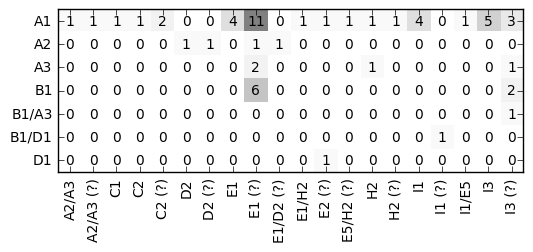

In [92]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', columns = 'Form_Gef', aggfunc = len, fill_value = 0)
#df_pivot
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

## Mündungs- & Randformen

In [117]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like 'DON%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Rand) != '')
           AND ((t_Obj.Form_Rand) NOT LIKE '%/%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)

df['Form_Rand2'] = df['Form_Rand'].map(lambda x: x.rstrip(' (?)'))

# display(df.head())

In [118]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M5,26,29.885057
M1,17,19.540230
M2,17,19.540230
M3,11,12.643678
M4,9,10.344828
M4/M5,2,2.298851
M2/M5,1,1.149425
M4/M1,1,1.149425
M4/M6,1,1.149425


In [119]:
len(df_pivot['objID'])    # Anzahl beobachtete Randformen

11

> **Tab. #** Dongo-Gruppe: Mündungsformen

In [120]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Rand2', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand2,,
B1.1,22,22.448980
A2.3,18,18.367347
B1,16,16.326531
A2,9,9.183673
A2.4,7,7.142857


> **Tab. #** Dongo-Gruppe: Randformen

In [121]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [122]:
df_pivot['objID'].sum()   # Anzahl GE mit bestimmter Randform

98

In [123]:
len(df_pivot['objID'])    # Anzahl beobachtete Randformen

19

In [124]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', columns = 'Form_Rand', aggfunc = len, fill_value = 0)
fig = plt.figure()
fig.set_size_inches(12, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

In [125]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

In [127]:
# leere Zellen & X entfernen
b = df['Form_Hals']
b = pd.DataFrame(b)
b = b.dropna()
#b = b[b['Form_Hals'] != 'X']
b
# enthält 'kurz' oder nicht
c = pd.Series({'kurz':len(b.loc[b['Form_Hals'].str.contains("kurz")].index),
               'nicht-kurz':len(b.loc[~b['Form_Hals'].str.contains("kurz")].index)})
c = pd.DataFrame(c)
c['Prozent'] = c[0]/c[0].sum()*100
c

,0,Prozent
kurz,13,27.083333
nicht-kurz,35,72.916667


In [128]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

### Bodenformen

In [129]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like 'DON%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,ort_kurz,ort_name,objID,Typ,Form_Gef,Form_Boden
0,DON,Dongo,1478,DON,I3 (?),B2
1,DON,Dongo,1920,DON (?),A2/A3,B4


## Verzierungselemente

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


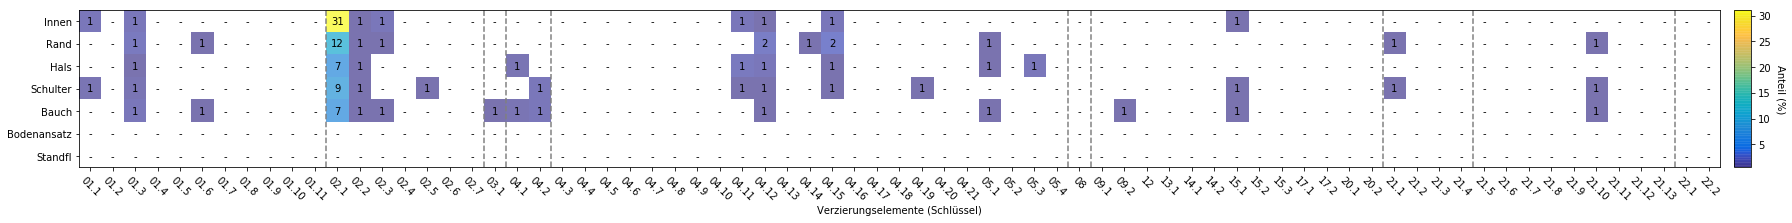

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-1-5_Dongo_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [142]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like 'DON%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [143]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

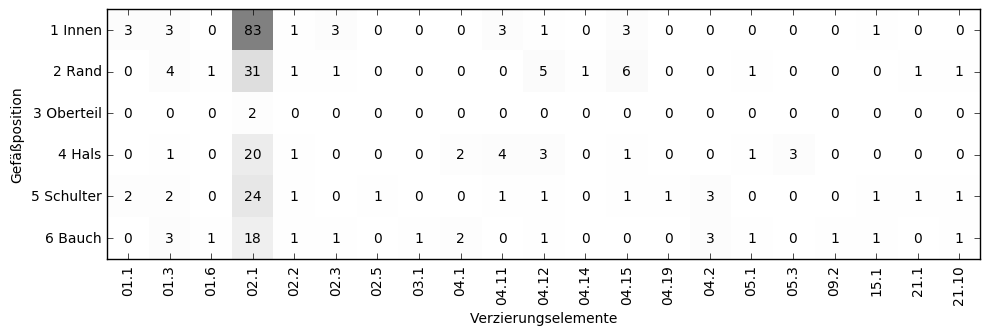

In [144]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/3-1-1-5_Dongo_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

In [145]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


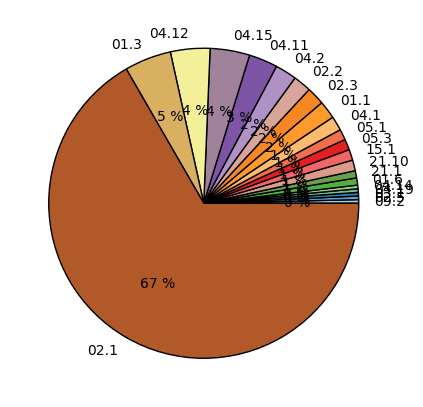

In [146]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

In [147]:
df.loc[df['verzName'].str.contains("21")]

,objID,posID,verzID,pos,verzName,verzBeschr,Typ,Form_Gef
161,5778,6,23,5 Schulter,21.1,vegetabilisches Roulette/Knotted String,DON,E1
164,5779,3,23,2 Rand,21.1,vegetabilisches Roulette/Knotted String,DON (?),None
167,5881,3,30,2 Rand,21.10,Schnitzroulette,DON (?),E2 (?)
169,5881,6,30,5 Schulter,21.10,Schnitzroulette,DON (?),E2 (?)
171,5881,7,30,6 Bauch,21.10,Schnitzroulette,DON (?),E2 (?)


In [148]:
a = pd.Series({'Roulette-Verzierung':len(df.loc[df['verzName'].str.contains("21")].index),
               'Weitere Verzierungen':len(df.loc[~df['verzName'].str.contains("21")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Roulette-Verzierung,5,1.872659
Weitere Verzierungen,262,98.127341


## Verbreitung

In [51]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
7,Ngbanja (Fpl. 199),199,18.092242,1.665022,DON
1,Bousoka-Mangombe (Fpl. 200),200,18.072635,1.871467,DON
2,Dongo (Fpl. 202),202,18.404747,2.721870,DON
4,Mbati-Ngombe (Fpl. 204),204,18.495671,2.888154,DON
8,Nzambi (Fpl. 205),205,18.637255,3.161920,DON
6,Motenge-Boma (Fpl. 206),206,18.648645,3.244495,DON
1,Batanga (Fpl. 209),209,18.594438,3.710706,DON (?)
5,Mboma (Fpl. 211),211,18.648525,3.947071,DON
0,Balongoi (Fpl. 214),214,18.644374,4.129969,DON
7,Mboko 1 (Fpl. 217),217,18.690290,4.367518,DON (?)


In [52]:
df.to_csv("../data/processed/3-1-1-5_DON_Verbreitung.csv", index = False)

## Tafeln

In [139]:
sql = """SELECT
           t_obj.objID,
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,objID,Typ,Form_Gef,Form_Rand,Form_Boden
0,7,13,DON,85/101,NaN,72,1921,DON,A2/A3 (?),C2,None
1,7,14,DON,85/101,NaN,55,6115,DON,E5/H2 (?),A2,None
2,7,15,DON,85/101,NaN,18,1940,DON (?),H2 (?),A2.4,None
3,8,1,DON,85/101,28,"3, 27, 28, 29, 31, 36, 43, 46, 48, 54, 58, 65",6132,DON,E1 (?),B1.1,None
4,8,10,DON,85/101,27,"3, 27, 28, 29, 31, 36, 43, 46, 48, 54, 58, 65",6132,DON,E1 (?),B1.1,None
5,8,2,DON,85/101,NaN,12,1932,DON,E1 (?),B1,None
6,8,3,DON,85/101,NaN,73,1478,DON,I3 (?),B1,B2
7,8,4,DON,85/101,NaN,78,1929,DON,I3,B2.1,None
8,8,6,DON,85/101,NaN,16,1926,DON,E1 (?),B1.1,None
9,8,7,DON,85/101,NaN,30,6129,DON (?),I1/E5,B3.1,None
